## 論文情報

### タイトル

Phrase-Based & Neural Unsupervised Machine Translation

### 解説記事

[教師なし学習は機械翻訳に魔法をかけるか？](http://deeplearning.hatenablog.com/entry/unsupervised_machine_translation)

## 翻訳全文

### Abstract

機械翻訳システムは、いくつかの言語では人間レベルの性能に近くなりますが、
その有効性は大量のbitextsの可用性に強く依存しているため、大多数の言語対への適用が妨げられています。

この作業は、各言語で大きな単一言語コーパスのみにアクセスするときにどのように翻訳するかを学ぶ方法を調査します。
我々は、ニューラルモデルとフレーズベースのモデルの2つのモデルバリエーションを提案する。

どちらのバージョンも、逆方向に動作する逆方向変換と、ターゲット側でトレーニングされた言語モデルのノイズ除去効果によって、
パラレルデータの自動生成を活用します。

これらのモデルは文献よりもはるかに優れていますが、より単純で、より少ない数のハイパーパラメータを持つことができます。

広く使用されているWMT'14英語 - フランス語とWMT'16ドイツ語 - 英語のベンチマークでは、
我々のモデルはそれぞれ27.1と23.6のBLEUポイントを単一の並列文を使用せずに取得し、11以上のBLEUポイントで最先端を凌駕しています。

### 1 Introduction

機械翻訳（MT）は、自然言語処理の分野における最近の成功と発展の旗艦です。

その実用化と配列変換アルゴリズムのためのテストベッドとしての使用は、このトピックに新たな関心を呼び起こしました。

最近の進歩は、神経アプローチを用いていくつかの言語対において人間レベルのパフォーマンスに近いことを報告しているが（Wu et al。、2016; Hassan et al。、2018）、
他の研究はいくつかの未解決の課題を強調している（Koehn and Knowles、2017; Isabelle et al 、2017; Sennrich、2017）。

大きな課題は、現在の学習アルゴリズムを大規模な並列コーパスに依存させることです。
残念なことに、大部分の言語ペアでは、並列データはほとんどありません。

学習アルゴリズムは、MTをより広く適用できるように、単一言語データをより有効に活用する必要があります。

文章の大部分は、限られた監督が可能な場合に翻訳パフォーマンスを向上させるために単一言語データの使用を研究してきました。 
この限られた監督は、典型的には、比較的少数の平行文の形で提供される（Sennrichら、2015a; Gulcehreら、2015; Heら、2016; Guら、2018; Wang et al。 、2018）、または他の関連する言語での大規模な組（ただし、Firatら、2016; Johnsonら、2016; Chenら、2017; Zhengら、2017）、またはバイリンガル辞書 Klementiev et al。、2012; Irvine and Callison-Burch、2014,2016）、または同等のコーパス（Munteanu et al。、2004; Irvine and Callison-Burch、2013）。

最近では、対照的に、Ravi and Knight（2011）の先駆的研究のように、各言語の単一言語コーパスのみに依存する、完全に監督されていない2つのアプローチが提案されている（Lample et al。、2018; Artetxe et al。、2018） ）。

この2つの最近の作品には微妙な技術的な違いがありますが、成功の根底にあるいくつかの共通の要素を特定しています。 

まず、推論されたバイリンガル辞書でモデルを慎重に初期化します。

第2に、雑音除去オートエンコーダー（Vincent et al。、2008）としてシーケンス - シーケンスシステム（Sutskever et al。、2014; Bahdanau et al。、2015）を訓練することにより、強力な言語モデルを活用する。

第3に、逆翻訳を介した文対の自動生成により、教師なし問題を監督者に変える（Sennrich et al。、2015a）。
逆変換では、重要なアイデアは、ソースをターゲットに変換するモデルとターゲットをソースに変換するモデルの2つを維持することです。 

前者のモデルは後者を訓練するためのデータを生成し、逆も同様である。

最後の一般的な特性は、これらのモデルが、エンコーダによって生成された潜在的な表現を2つの言語にわたって共有するように制約することです。 

これらの部分をまとめると、エンコーダは入力言語に関係なく同様の表現を生成します。
デコーダは、言語モデルとしても、騒々しい入力からのトランスレータとしても訓練されており、
後方モデル（ターゲットからソースへの操作）と並行してますます優れた変換を生成することを学びます。 

この反復プロセスは、完全に監督されていない設定で顕著な結果を達成する。 
例えば、WMT'14英語 - フランス語ベンチマークでは約15BLEUポイントとなる。

本稿では、これらの2つの以前の神経アプローチを組み合わせたモデルを提案し、上記の原則に従ったままアーキテクチャと損失機能を単純化します。
結果として得られたモデルは以前のアプローチよりも優れており、訓練とチューニングが容易です。 

次に、従来のフレーズベースの統計的機械翻訳（PBSMT）システム（Koehn et al。、2003）にも同じ考え方と方法論を適用します。
PBSMTモデルは、データが不足している場合には神経モデルより優れていることはよく知られていますが、
神経モデルは一般に数百万のパラメータに対応していますが、データが豊富では一般性が高いが、 データが不足しています。 

私たちのPBSMTモデルはシンプルで、解釈が容易で、トレーニングが早く、NMTのものと似た、またはより良い結果を達成することがよくあります。

NMTモデルを使用している場合は広く使用されているベンチマークで最大+ 10BLEUポイント、PBSMTモデルでは最大+ 12ポイントの利益が得られます。 
これは、監視されていない環境での状態を著しく進歩させる。 この論文の残りの部分は次のように構成されています。

第2章では、教師なし機械翻訳に対する我々のアプローチの根底にある主要原則を紹介する。
3章では、これらの原理を用いたNMTとPBSMTモデルを紹介し、4章で経験的に評価する。
最後に、5章で他のアプローチとどのように関係するかを議論する。

### 2 Principles of Unsupervised MT

ターゲットとソースの文章を関連づける方法は潜在的に多く存在するため、単一言語のデータだけで翻訳することを学ぶのは面倒な作業です。
それにもかかわらず、第5章の関連研究で議論されているように、近年この問題を解決するには、エキサイティングな進歩があった。

このセクションでは、この最近の研究によってもたらされた特定の仮定から逸脱し、 監督されていないMT。
教師なしのMTは、図1に示す3つのコンポーネント（適切な初期化、言語モデリング、反復的逆変換）を活用することで達成できると主張している。 

以下では、これらのコンポーネントのそれぞれについて説明し、後に、ニューラル・フレーズ・ベースのモデルでより優れたインスタンス化を行う方法について説明します。

初期化：

教師なしの翻訳は不適切なので、単語、短いフレーズ、またはサブワード単位（Sennrich et al。、2015b）が整列するように、モデルを初期化することが期待される一連の解決策を表現する前に、 例えば、Klementiev et al。 （2012）は提供されたバイリンガル辞書を使用したが、Lampleら （2018）およびArtetxe et al。 （2018）は監督されていない方法で推論された辞書を使用した（Conneau et al。、2018; Artetxe et al。、2017）。 
動機づけられる直感は、そのようなアライメントが最初の「単語単位」の翻訳を実行するために使用できることである。 また、言語やコーパスが密接に関連していなければ、翻訳が不十分になることもありますが、元の意味を保持することができます。

言語モデリング：

大量の単一言語データが与えられると、ソース言語とターゲット言語の両方で言語モデルを訓練することができます。 これらのモデルは、文章を各言語でどのように読むべきかについて、データ駆動型であることを表しています。 それらは、ローカルの置換および並べ替えの単語を実行することによって翻訳の品質を向上させる。

反復逆翻訳：

第3の構成要素は逆翻訳（Sennrich et al。、2015a）であり、半監督設定で単一言語データを活用する最も効果的な方法です。 
管理されていない設定でのそのアプリケーションは、機械翻訳システムをターゲットからソース言語に変換する後方モデルと結合することです。 

このモデルの目的は、単一言語コーパス内の各ターゲット文に対するソースセンテンスを生成することです。

これは、混乱している教師なしの問題を、雑音の多いソース文ではあるが、監督された学習タスクに変える。 元のモデルの翻訳が良くなるので、現在のモデルを使用して逆変換モデルを改善し、反復アルゴリズム（Heら、2016）を得ることもできる。

### 3 Unsupervised MT systems

セクション2で詳述された3つの原理を備え、NMTモデル（セクション3.1）またはPBSMTモデル（セクション3.2）の文脈でそれらを効果的に組み合わせる方法を議論する。
この論文では、ソース文とターゲット文の空間をそれぞれSとTで表し、言語モデルをソースとターゲットの単一言語データセットでそれぞれPsとPtで訓練した。
最後に、Ps→tとPt→sによって、ソースからターゲットへの変換モデルを示し、逆もまた同様である。 我々のアプローチの概要は、アルゴリズム1で示されている。

#### 3.1 Unsupervised NMT

我々は今、Artetxe et al。による以前の研究から導かれた新しい教師なしNMT法を紹介する。 （2018）およびLample et al。 （2018）。 
先に述べた3つの重要な原則が私たちの仕事でどのように具体化されているかを議論し、NMTに特有で重要なシステムの重要な特徴を紹介します。 
一般に、NMTモデルは、エンコーダとデコーダで構成され、 このアーキテクチャの具体的な詳細はセクション4で与えられます。

初期化：

以前の研究ではバイリンガル辞書に頼っていたが、ここでは関連言語に適したより効果的で簡単な手法を提案する。

まず、単語を考慮する代わりに、BPE（byte-pair encodings）を考察する（Sennrich et al。、2015b ）の2つの主な利点があります。
つまり、語彙のサイズが小さくなり、出力変換で未知語が存在しなくなります。

第2に、ソース言語とターゲット言語のBPE間の明示的なマッピングを学習する代わりに、両方の単一言語コーパスを共同で処理することによってBPEトークンを定義します。 

言語が関連している場合、この研究で考慮しているように、BPEトークンを自然に共有するため、バイリンガル辞書を推論する必要はありません。

実際には、i）単一言語コーパスに参加し、ii）結果のコーパスにBPEトークン化を適用し、iii）エンコーダおよびデコーダのルックアップテーブルを初期化するために使用されるトークン埋め込みを学習する。

言語モデリング：

NMTでは、言語モデリングは、以下を最小限に抑えて、自動コード化を使用して行われます。
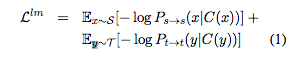

CはLampleらのようにいくつかの単語が落とされ交換されたノイズモデルである。 
（2018）。 Ps→s（Pt→t）は、両方ともソース（ターゲット）側で動作するエンコーダmおよびデコーダの構成である。

逆変換：u *（y）= arg max Pt→s（u | y）となるようにyから推論された原言語の文をu *（y）で表すことにする。

同様に、v *（x）= arg max Ps→t（v | x）となるようにxから推論された目的言語の文をv *（x）で表すとする。

対（u *（y）、y）と（x、v *（x）））は、逆翻訳原理に従って新しいMTモデルを学習することができる整列文として見ることができる。m
したがって、逆変換の損失は次のとおりです。

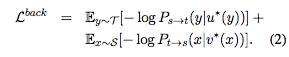

この目的関数を最小にするとき、データを生成した逆モデルを使用して、簡単にするために、またそのときに改善を観察しなかったので、我々は逆戻りしないことに注意してください。

学習プロセスの各反復（t）で最小化される目的関数、すなわち確率勾配降下の勾配ステップは、単純に式のL backの和である。 
1とL lmを式 しかし、それだけではうまくいきません。なぜなら、それはあまりにも拘束されていないからです。
例えば、目標空間内で動作する復号器は、目標文の符号化表現および原文の符号化表現の両方を供給したときの両方でうまく動作しなければならない。 

残念なことに、システムは、潜在空間を2つに分割し、言語モデリングタスクに1つの部分空間を、翻訳タスクにもう1つの部分空間を使用することによって、ノイズ除去および翻訳の損失を不正確にして完全に最小限に抑えることができます。
明らかに、後方モデルを逆転させ、言語モデルを個別に学習することを学ぶだけでは、うまく翻訳できません。 これは、我々が次に議論する神経の監督されていない機械翻訳に必要な追加の制約につながる。

潜在的表現の共有：

共有エンコーダ表現はインターリングアのように動作し、入力ソース言語に関係なくデコーダのターゲット言語で翻訳されます。
これにより、ノイズ除去自動認識の目的で実装された言語モデリングの利点が、ノイズの多いソースからの翻訳にうまく移行し、最終的にNMTモデルがより流暢に翻訳できるようになります。

エンコーダ表現を共有するために、ソース文の潜在的表現がソース言語に対して堅牢であることを保証するために、2つの言語にわたってすべてのエンコーダパラメータ（結合トークンを実行するための埋め込み行列を含む）を共有する。
同様に、我々は2つの言語にわたってデコーダパラメータを共有する。モデルを機能させるためにはエンコーダを共有することが重要ですが、デコーダを共有するだけで有益な正則化を誘導します。

以前の研究（Johnson et al。、2016）と異なり、デコーダの最初のトークンは、エンコーダが言語識別子を持たない間、モジュールが動作している言語を指定します。
関連言語のバイリンガル辞書を推論する必要性を排除するBPEジョイントトークン化とアーキテクチャの選択の両方とも、以前の研究とは異なる（Artetxe et al。、2018; Lample et al。、2018）。

さらに、Artetxeらとは異なり、ここではデコーダを共有します。 （2018）。 Lample et al。 （2018年）、我々はまた、オンラインでのバック・トランスレーションを行い、潜在的な表現を共有するのにアーキテクチャーとトークン化が十分であるため、損失の苦境を欠いている。全体として、これらの変更はモデルを単純化し、ハイパーパラメータの数を減らします。

### 3.2 Unsupervised PBSMT

このセクションでは、PhraseBased Statistical Machine Translation（PBSMT）システム（Koehn et al。、2003）を基盤とするバックボーンモデルとして教師なし機械翻訳を実行する方法について説明します。 

PBSMTモデルは、低リソース言語のペアでうまく動作することが知られているため、監督されていない設定では、神経モデルの代わりになる可能性があります。 xからyへの変換の際、PBSMTシステムは以下の式に従ってスコアを計算する：arg maxy P（y | x）= arg maxy P（x | y）P（y）、P（x | y） テーブル "、P（y）は言語モデルのスコアである。

bitextsのデータセットが与えられると、PBSMTはまず整列を推論し、フレーズテーブルを作成します。 
フレーズテーブルの各エントリは、ソース言語の特定のnグラムがターゲット言語の別のnグラムにマッピングされる可能性、すなわち正規化されたカウントに基づく推定を格納します。 

実際には、実際のスコアリングは、nグラム間の相対的な位置のずれを考慮に入れるなど、他の用語が頻繁に導入されているため、少し複雑です。フレーズテーブルのフレーズテーブルを考慮する 監督されていない設定では、単一言語データの言語モデルを簡単に習得できますが、翻訳のために必要なフレーズテーブルをどのように作成するのかは不明です。 幸いにも、神経の場合と同様に、第2節の原則はこの問題を解決するのに有効です。

初期化：

我々は、Conneauらが提案した方法を用いて、単一言語コーパスから構築された推論されたバイリンガル辞書を使用して、最初のフレーズテーブルを（ソースからターゲットに、ターゲットからソースに）移入する。 （2018）。 これらのフレーズ表には、ソース単語の翻訳のスコアを次のように設定することによってunigrams2が設定されます。

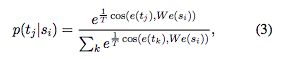

ここで、tjはターゲットボキャブラリのj番目の単語、siはソースボキャブラリのi番目の単語、Tは分布のピークを調整するためのハイパーパラメータ、Wはソース埋め込みをマッピングする回転行列 ターゲット埋め込み（Conneau et al。、2018）、e（x）はxの埋め込みである。

言語モデリング：

KenLM（Heafield、2011）を使用して、ソースとターゲットの両方のドメインで平滑化されたn-gram言語モデルを学習しますが、神経モデルも考慮に入れることができます。 これらは、トレーニングの反復を通じて固定されたままです。

反復逆翻訳：

反復プロセスを開始するために、ターゲット側のunigramフレーズテーブルと言語モデルを使用して、シードPBSMTを構築します。

次に、このモデルを使用してソース単一言語コーパスをターゲット言語に変換します（逆変換ステップ）。
データが生成されたら、教師付きモードでPBSMTを訓練して、生成されたデータを元の原文に戻します。

次に、生成と訓練の両方のプロセスを実行しますが、逆方向に実行します。アルゴリズム2を参照してください。直感的に、フレーズテーブルの多くのエントリは正しくありません。

なぜなら、トレーニング中の任意の時点でのPBSMTへの入力にノイズが多いからです。それにもかかわらず、言語モデルは、生成時にこれらのミスのいくつかを修正できる可能性があります。
それが起こる限り、翻訳は改善され、それとともに、次のラウンドでフレーズテーブルが作成されます。正しいフレーズに対応するエントリが増えます。これにより、PBSMTモデルのテーブルが大きくなり、より長いスパンでフレーズスワップが可能になります。

### 4 Experiments

最初に我々が使用したデータセットと実験プロトコルについて述べる。 次に、以前の試み（Artetxe et al。、2018; Lample et al。、2018）、半監視法（Gu et al。、2018）、および さまざまな量のラベル付きデータ。 我々は、システム内の各構成要素の重要性と翻訳の定性的評価を理解するためのアブレーション試験を行います。

#### 4.1 Datasets and Methodology

英語 - フランス語、英語 - ドイツ語、英語 - ルーマニア語、英語ロシア語の4つの言語ペアを検討します。
最初の2つの対は、教師なしMTに関する最近の研究（Artetxe et al。、2018; Lample et al。、2018）と比較するために使用される。
最後の2つのペアは、本当に低リソースのペア（Gu et al。、2018）または同じアルファベットを共有しない無関係な言語でPBSMT監督されていない方法をテストするために使用されます。

英語、フランス語、ドイツ語、ロシア語の場合は、2014年から2017年までのWMT単一言語のニュースクロールデータセットから5千万センチを使用しています。ルーマニア語の場合、ニュースクロールデータセットは220万文のみで構成されているため、単一言語データWMT'16からは299万件の判決が出された。 

en-frのための新しく2014年の結果、en、en、enの新しい2016年の結果を報告します。我々はトークン化のために公開されているMoses4スクリプトの実装を使用します。 NMTは60,000のBPEコードで訓練されています。 PBSMTは真のケーシングで訓練され、単一言語データセット（Sennrich et al。、2016）全体での一貫性のない使用に対処するためにソース側でルーマニア語の発音区別記号を削除します。

#### 4.2 Initialization

NMTとPBSMTの両方のアプローチでは、クロスリンガルBPE埋め込み（共有ルックアップテーブルを初期化する）またはnグラム埋め込み（フレーズテーブルを初期化する）のいずれかが必要です。 我々は、埋め込み次元512を持つfastText（Bojanowski et al。、2017）5、サイズ5のコンテキストウィンドウと10個の負のサンプルを用いて埋め込みを生成する。 NMTでは、ソースとターゲットのコーパスの連結にfastTextが適用され、en-frやen-deなどの関連する言語ペアに対してクロスリンガルBPE埋め込みが行われます。 トークンの95％以上がこれら2つの言語ペアで共有されていると見積もっています。 次に、PBSMTでフレーズテーブルを初期化する方法について説明します。

#### 4.2.1 Phrase Table Initialization

PBSMTでは、ソースとターゲットコーパスに独立してn-gram埋め込みを生成し、MUSEライブラリ6を使用してそれらを整列させます（Conneau et al。、2018）。

可能なすべてのフレーズのユニークな埋め込みを学習するのは難しいので、我々は最も頻繁に300,000のソースフレーズを考慮し、それぞれをターゲット空間の200個の最も近い近隣に整列させ、フレーズテーブルは6,000万フレーズペア 式の式を使用してスコアを計算します。 

実際には、バイグラムのフレーズテーブルをユニグラムのフレーズテーブルと比較して、約1つのBLEUポイントの小さいが有意な差異を観察するが、長いフレーズを使用して改善を観察しなかった。 表1はフランス語 - 英語の教師なしフレーズテーブルの抽出を示しており、ユニグラムがバイグラムに正しく整列されていることがわかり、その逆もあります。

### 4.3 Training

次のサブセクションでは、モデルのアーキテクチャとトレーニング手順について詳しく説明します。

#### 4.3.1 NMT

この研究では、LSTM（Hochreiter and Schmidhuber、1997）とTransformer（Vaswani et al。、2017）細胞に基づくNMTモデルを使用します。 LSTMモデルでは、Lampleらのアーキテクチャと同じアーキテクチャを使用します。 （2018）。

トランスフォーマーでは、エンコーダーとデコーダーの両方で4つのレイヤーを使用します。 両方のモデルで、ルックアップテーブルBPE埋め込みを含むすべてのパラメータを共有します。 埋め込みと隠れ層の次元数は512に設定されています。すべてのモデルで、学習率10-4、β1= 0.5、バッチサイズ32のAdamオプティマイザ（Kingma and Ba、2014）を使用しました。 デコード時には、貪欲に生成します。

#### 4.3.2 PBSMT

PBSMTについては、セクション4.2.1で説明したようにフレーズテーブルを初期化したMosesを使用します。 言語モデルはデフォルトの平滑化されたnグラム言語モデルであり、リオーダリングモデルは最初の世代では無効になっています。 PBSMTは、アルゴリズム2を使用して反復的に訓練されます。各反復で、原言語の単一言語データセットから無作為にサンプリングされた5百万の文を翻訳します。 初期化を除いて、フレーズテーブルの長さは3までです。

### 4.4 Model selection

MosesのPBSMTの実装には、各スコアリング関数の相対的重み付け、ペナルティなど15のハイパーパラメータがあります。この作業では、これらのハイパーパラメータを設定する2つの方法を検討します。ツールボックスのデフォルト値に設定するか、パラレルセンテンスの小さな検証セットを使用して設定します。

検証セットには10​​0個のラベル付き文があるだけで、PBSMTは検証セットにオーバーフィットすることが判明しました。たとえば、en→frの場合、100パラレルセンテンスに調整されたPBSMTは、デフォルトのハイパーパラメータを使用する27.09と比較して、newstest 2014で26.42のBLEUスコアを取得し、新しい2013の3000のパラレルセンテンスでチューニングすると28.02です。論文で考慮されているすべてのPBSMTモデルでは、デフォルトのハイパーパラメータ値が使用され、並列リソースはまったく使用されません。

NMTについては、Lampleらのように、「ラウンドトリップ」翻訳のBLEUスコア（ソース→ターゲット→ソースとターゲット→ソース→ターゲット）に基づく2つのモデル選択手順も考慮する。 （2018）であり、もう1つは100個の並列文からなる小さな検証集合に基づくものである。私たちの実験では、Transformerモデルを使用しているときに、監督されていない基準がテストメトリックと高度に相関することがわかりましたが、LSTMでは必ずしもそうではありませんでした。したがって、特に明記されていない限り、我々は100個の並列文の小さな検証集合とLample et al。で定義された教師なし基準を持つ最良のTransformerモデルを用いて最良のLSTMモデルを選択する。 （2018）。

### 4.5 Results

表2に報告された結果は、監督されていないNMTとPBSMTの両方が、以前の監督されていないベースラインよりも大幅に優れていることを示しています。例えば、en→frタスクでは、教師なしPBSMTはBLEUスコア27.09を取得し、Artetxe et al。 （2018）は15.13とLample et alのみを得た。 （2018）15.04。

私たちは、すべての言語ペアと双方向の大きな利益を報告します。 en→deのようなもっと複雑なタスクであっても、PBSMTとNMTの両方がベースラインスコアを10以上のBLEUポイント超えています。教師なしのフレーズテーブルのみを備えたPBSMTモデル（すなわち、逆変換を開始する前）は、以前のアプローチよりも著しく優れており、埋め込みがfastTextで学習されるとMUSEを使用して数分で生成することができる。

表2の最後の行は、PBSMT（PBSMT + NMT）によって生成されたデータに対してNMTモデルをさらに調整することによって、追加の利益を得ることができることも示しています。ここでは、監督されていないPBSMTシステムによって生成されたデータを、NMTモデルによって生成された逆変換されたデータに単純に追加します。 PBSMTとNMTを組み合わせることにより、困難な翻訳作業で19.16のBLEUスコアを達成し、de→enタスクのパフォーマンスを23.62ポイントまで高めることができます。

我々はまた、NMTモデル（NMT + PBSMT）によって生成された逆翻訳データを用いてPBSMTモデルをブーストすることを試みたが、これはPBSMT単独では改善しなかった。次に、完全監視モデルと比較します。

図2は、さまざまな数のトレーニング例のパラレルデータセットを使用して完全に監視された方法で訓練された同じアーキテクチャのパフォーマンスを示しています。監視されていないPBSMTモデルは、ほぼ10万センチの訓練を受けた管理されたカウンターパートと同じパフォーマンスを達成することができます。

これらの監督されていない方法は、ラベルなしの価格で合理的な翻訳モデルを生成し、低リソースの言語を翻訳するための実行可能な代替手段となっている。これは、ルーマニア語（Ro）のような低リソース言語で確認されています。

特に、ro→en言語ペアでは、PBSMTモデルは、単一の並列文を使用せずにBLEUスコアを21.0、モデルの重みを調整するために小さな検証セットを使用する場合に22.2を取得します。比較として、Guらは、 （2018）は、6,000のパラレルセンテンス、シード辞書、5つの異なる言語の並列リソースを組み合わせたマルチNMTシステムを利用して22.9 BLEUを取得します。

最後に、教師なしのPBSMTをロシア語のような非常に異なる言語でテストし、ruでの15.4という優れたBLEUスコアを取得しました。このアプローチは遠隔言語でもうまく機能します。

反復逆並進：

表3は、反復訓練プロセスの間、すなわち各逆変換ステップ後のPBSMTモデルの品質を示す。 
これは、複数の逆翻訳反復を行うことの重要性を強調する。 例えば、en-frタスクでは、fr→enモデルは反復0で15.42のBLEUスコアを取得します。
つまり、反復されたフレーズテーブルの作成後に、反復4で24.67のスコアを達成します。同じ改善が観察できます 私たちはさまざまな言語のペアでテストしました。 我々が反復するにつれて、BLEUスコアは飽和するまで着実に増加し、反復の重要性を示している。 
en→deタスクでは、反復回数1の15.06から反復回数4の16.71への増加はそれほど顕著ではありませんが、依然として重要です。

### 4.6 Ablation Study

我々のモデルの各構成要素の重要性をよりよく理解するために、我々はfr→enデータ上のNMT-Transformerモデルのアブレーション試験を実施した。

まず、目的関数内のノイズ除去オートエンコーダ項を削除すると、式 1、モデルはまったく翻訳することを学ばない。
式（5）の逆変換の目的を削除すると、同様の破局的な失敗が観察されます。 

2.デコーダを共有しないと、検証セットのパフォーマンスはBLEUポイントの半分だけ増加しますが、テストセットの同じ量だけ減少します。 最後に、事前に訓練された埋め込みを使用してモデルを初期化しないと、モデルは学習しますが、セクション4.2に従って初期化されたモデルの25.1ではなく、10.5の単なるBLEUスコアに達するはるかに低速ではるかに低い精度になります。

### 4.7 Qualitative study

表4は、NMTモデルとPBSMTモデルの学習アルゴリズムの異なる繰り返しで、フランス語 - 英語の新しい2014年データセットからのフランス語文の翻訳の例を示しています。

スクランブルされていないフレーズテーブルのみを使用するバックトランスレーションの最初の反復の前に、PBSMTトランスレーションは、ターゲット言語の構文を尊重しないが、依然としてオリジナルの意味の大部分を含むワード単位の翻訳から遠くない 文章。 NMTのエポックの数を増やし、PBSMTを反復するにつれて、監督されていない翻訳の品質が継続的に向上することがわかります。

興味深いことに、第2の例では、PBSMTモデルとNMTモデルの両方が英語の「舌」または「言語」として翻訳できるフランス語の「langue」の多義語には適合しません。 これらの翻訳はいずれも教師なしフレーズテーブルに存在していたが、 "言語"の正しい翻訳である "言語"の条件付き確率は、 "舌"のものに比べて非常に高かった：P（言語|ラング）= 0.92、 P（舌|ラング）= 0.0005。 

比較として、監督された方法で訓練されたモーゼスモデルの句テーブルは、P（言語|ラング）= 0.633、P（舌|ラング）= 0.0076を含み、「ラング」が正しく翻訳される確率が高い。 これは、最初の監督されていないフレーズアライメント手順の重要性を強調する。

## 5 Related Work

監督なしに翻訳することを学ぶことは、MTコミュニティにとって長年の研究課題でした。完全に監督されていない機械翻訳における最初の試みは、言語的な事前知識を活用して解読の一例としてタスクを再構成し、限られた語彙で短い文の実行可能性を実証するRavi and Knight（2011）の研究である。 Carbonell et al。 （2006年）も教師のない機械翻訳を目的としていましたが、バイリンガル辞書を活用して翻訳を開始しました。どちらの作品も、翻訳の流暢さを正すために、ターゲット側の言語モデルに依存しています。

これらの精神的な研究は、バイリンガル辞書、数千文の小さな並列コーパス、および検索空間を刈るための言語的に動機付けされた機能に依存するその後のアプローチ（Klementiev et al。、2012; Irvine and Callison-Burch、2014,2016）興味深いことに、IrvineとCallison-Burch（2014）は単一言語データを使用して、監督された設定で学習されたフレーズテーブルを展開します。私たちの研究では、フレーズテーブルも拡張していますが、神経モデルを使ってPBSMTを改善することを目指しているコネクティビティ主義者の古い研究の後、推測されたバイリンガルのユニグラム辞書で初期化します（Schwenk、2012; Kalchbrenner and Blunsom、 2014）。

近年、データ変換の目的のためにターゲット側で単一言語データを使用することは、逆変換と呼ばれる方法（Sennrich et al。、2015a）によって大きな進歩を遂げています。逆変換では、ターゲットからソースに訓練されたモデルは、モデルを正規化するために正規のトレーニングセットに追加される変換を生成します。

この方法はおそらく、半言語データを半監視設定で活用する最も効果的な方法であり、Heらの「二重学習」フレームワークに統合されています。 （2016）、その後の拡張（Wang et al。、2018）を含む。

私たちのアプローチは二重学習フレームワークに似ていますが、それらのモデルは比較的大量のラベル付きデータを使用して事前に計算され、勾配は逆モデルによって逆伝播されますが、我々のアプローチは完全に監督されません。

最後に、Lample et al。 （2018）およびArtetxe et al。 （Conneau et al。、2018; Artetxe et al。、2017）を用いて、大規模なベンチマークデータセットを完全に監督しない機械翻訳を達成した。さらに、これらの作業は、バックトランスレーション、強力な言語モデル（ノイズ除去自動エンコーダーを介して実装）、ルックアップテーブルの賢明な初期化、エンコーダー間のウェイト共有、潜在的な表現（エンコーダー出力）を言語ペア間で整列させる敵対的なトレーニング損失に依存します。私たちのアプローチはいくつかの点で異なります。まず、Artetxeらと同様に、双方向のオンライン逆変換を実行します。

（2018年）と二重学習のフレームワーク。第2に、単語とサブワード（BPE）トークン（Sennrich et al。、2015b; Press and Wolf、2016）のかなりの部分が、通常、関連する言語間で共有されていることを認識することによって、言語。特に、このオーバーラップは、複雑な初期化スキームや敵対的な損失条件を必要とせずに、潜在的な表現を整列させるのに十分な場合が多いことがわかります。

## 6 Conclusions and Future Work

この作業では、完全に監督されていない機械翻訳における最近の成功の根底にある3つの原則を合成する：（1）適切な初期化（例えば、バイリンガル辞書の推論による）。 （2）強力な言語モデルを活用する。 （3）逆翻訳による人工的に生成された並列データによる反復的な訓練。これらの原理を用いて、我々は、単純化された神経モデルと教師なしMTのための新しいフレーズベースのモデルの両方を提案する。

これらのモデルは、複数のベンチマークデータセットと言語ペアにわたる最先端の翻訳パフォーマンスを実現します。場合によっては、以前のベストモデルを+12 BLEUポイントで向上させることができます。

次に、ニューラル・フレーズ・ベースのモデルを組み合わせることで、パフォーマンスをさらに向上させることができます。将来的には、監督されていない方法でn-gramを並べたフレーズテーブルの初期化についてさらに検討する予定です。最後に、これらの方法を半監視設定に拡張する方法と、他の言語のペアで大量のラベル付きデータを設定する方法を検討する予定です。